In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
import missingno as msno
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score,classification_report, accuracy_score, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

In [2]:
df = pd.read_csv('dataset_classification/user_behavior_dataset.csv')

In [3]:
df

,User ID,Device Model,Operating System,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,Gender,User Behavior Class
0,1,Google Pixel 5,Android,393,6.4,1872,67,1122,40,Male,4
1,2,OnePlus 9,Android,268,4.7,1331,42,944,47,Female,3
2,3,Xiaomi Mi 11,Android,154,4.0,761,32,322,42,Male,2
3,4,Google Pixel 5,Android,239,4.8,1676,56,871,20,Male,3
4,5,iPhone 12,iOS,187,4.3,1367,58,988,31,Female,3
...,...,...,...,...,...,...,...,...,...,...,...
695,696,iPhone 12,iOS,92,3.9,1082,26,381,22,Male,2
696,697,Xiaomi Mi 11,Android,316,6.8,1965,68,1201,59,Male,4
697,698,Google Pixel 5,Android,99,3.1,942,22,457,50,Female,2
698,699,Samsung Galaxy S21,Android,62,1.7,431,13,224,44,Male,1


array([[<Axes: title={'center': 'User ID'}>,
        <Axes: title={'center': 'App Usage Time (min/day)'}>,
        <Axes: title={'center': 'Screen On Time (hours/day)'}>],
       [<Axes: title={'center': 'Battery Drain (mAh/day)'}>,
        <Axes: title={'center': 'Number of Apps Installed'}>,
        <Axes: title={'center': 'Data Usage (MB/day)'}>],
       [<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'User Behavior Class'}>, <Axes: >]],
      dtype=object)

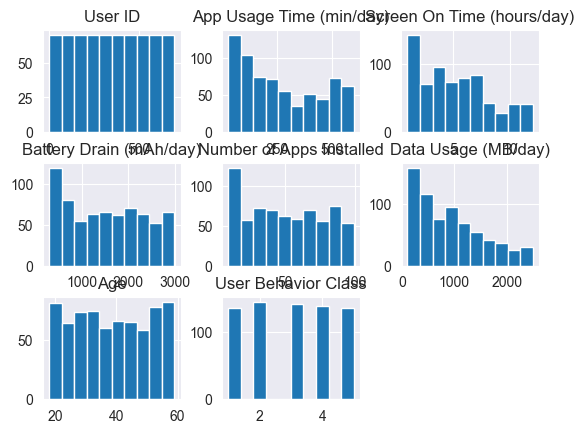

In [4]:
df.hist()

In [5]:
encoder = LabelEncoder()

df['Gender'] = encoder.fit_transform(df['Gender'])
df['Device Model'] = encoder.fit_transform(df['Device Model'])
df['Operating System'] = encoder.fit_transform(df['Operating System'])

In [6]:
df['Device Model'].unique()

array([0, 1, 3, 4, 2])

In [7]:
df['Operating System'].unique()

array([0, 1])

In [8]:
df['Gender'].unique()

array([1, 0])

In [9]:
encoder.classes_

array(['Android', 'iOS'], dtype=object)

In [10]:
df

,User ID,Device Model,Operating System,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,Gender,User Behavior Class
0,1,0,0,393,6.4,1872,67,1122,40,1,4
1,2,1,0,268,4.7,1331,42,944,47,0,3
2,3,3,0,154,4.0,761,32,322,42,1,2
3,4,0,0,239,4.8,1676,56,871,20,1,3
4,5,4,1,187,4.3,1367,58,988,31,0,3
...,...,...,...,...,...,...,...,...,...,...,...
695,696,4,1,92,3.9,1082,26,381,22,1,2
696,697,3,0,316,6.8,1965,68,1201,59,1,4
697,698,0,0,99,3.1,942,22,457,50,0,2
698,699,2,0,62,1.7,431,13,224,44,1,1


In [11]:
x = df.drop(columns='User Behavior Class')
y = df['User Behavior Class']

In [12]:
x

,User ID,Device Model,Operating System,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,Gender
0,1,0,0,393,6.4,1872,67,1122,40,1
1,2,1,0,268,4.7,1331,42,944,47,0
2,3,3,0,154,4.0,761,32,322,42,1
3,4,0,0,239,4.8,1676,56,871,20,1
4,5,4,1,187,4.3,1367,58,988,31,0
...,...,...,...,...,...,...,...,...,...,...
695,696,4,1,92,3.9,1082,26,381,22,1
696,697,3,0,316,6.8,1965,68,1201,59,1
697,698,0,0,99,3.1,942,22,457,50,0
698,699,2,0,62,1.7,431,13,224,44,1


In [13]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [14]:
gaussianNB = GaussianNB()

gaussianNB.fit(x_train, y_train)

GaussianNB()

In [15]:
x_test

,User ID,Device Model,Operating System,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,Gender
179,180,4,1,539,11.9,2853,83,2007,55,1
515,516,1,0,126,2.2,1187,28,599,25,1
282,283,4,1,386,7.7,2114,72,1209,51,1
239,240,4,1,573,10.8,2711,96,2118,33,0
557,558,2,0,198,4.2,1392,43,640,27,1
...,...,...,...,...,...,...,...,...,...,...
197,198,1,0,151,3.7,1116,32,320,41,0
22,23,2,0,423,6.5,2094,65,1372,23,0
633,634,1,0,138,3.2,1142,31,366,29,0
453,454,0,0,88,1.3,557,13,164,43,1


In [16]:
y_pred = gaussianNB.predict(x_test)

In [17]:
y_pred

array([5, 2, 4, 5, 3, 4, 1, 4, 2, 2, 4, 1, 3, 1, 1, 1, 5, 4, 2, 4, 1, 4,
       4, 3, 3, 5, 5, 4, 1, 3, 5, 1, 1, 1, 1, 4, 5, 5, 4, 5, 1, 5, 2, 1,
       5, 3, 1, 3, 4, 5, 2, 5, 4, 5, 3, 3, 3, 1, 3, 4, 5, 2, 2, 5, 5, 3,
       5, 3, 3, 4, 3, 3, 2, 3, 4, 5, 2, 1, 2, 3, 4, 4, 5, 2, 5, 5, 3, 1,
       1, 2, 1, 4, 1, 1, 5, 4, 3, 2, 4, 3, 5, 5, 5, 3, 5, 4, 5, 1, 4, 2,
       1, 4, 4, 1, 1, 2, 1, 4, 4, 1, 5, 2, 2, 4, 1, 5, 5, 5, 4, 3, 4, 3,
       3, 2, 5, 2, 4, 2, 1, 1])

In [18]:
print(accuracy_score(y_test,y_pred))
print(f1_score(y_test,y_pred,average='micro'))
print(f1_score(y_test,y_pred,average='macro'))
print(confusion_matrix(y_test,y_pred))

1.0
1.0
1.0
[[30  0  0  0  0]
 [ 0 21  0  0  0]
 [ 0  0 25  0  0]
 [ 0  0  0 31  0]
 [ 0  0  0  0 33]]


In [19]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        30
           2       1.00      1.00      1.00        21
           3       1.00      1.00      1.00        25
           4       1.00      1.00      1.00        31
           5       1.00      1.00      1.00        33

    accuracy                           1.00       140
   macro avg       1.00      1.00      1.00       140
weighted avg       1.00      1.00      1.00       140

